考虑到情形得分加权不仅可以用IPW，还可以用OW，因此这里系统介绍PS加权这个大类方法。

使用{twang}包的`Lindner`数据集。

In [2]:
library(twang)

To reproduce results from prior versions of the twang package, please see the version="legacy" option described in the documentation.



In [7]:
data(lindner, package = "twang")

In [8]:
head(lindner)

,lifepres,cardbill,abcix,stent,height,female,diabetic,acutemi,ejecfrac,ves1proc,sixMonthSurvive
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,0.0,14301,1,0,163,1,1,0,56,1,FALSE
2,11.6,3563,1,0,168,0,0,0,56,1,TRUE
3,11.6,4694,1,0,188,0,0,0,50,1,TRUE
4,11.6,7366,1,0,175,0,1,0,50,1,TRUE
5,11.6,8247,1,0,168,1,0,0,55,1,TRUE
6,11.6,8319,1,0,178,0,0,0,50,1,TRUE


# {PSW}包

$weight
[1] "OVERLAP"

$ps.model

Call:  glm(formula = as.formula(form.ps), family = binomial(link = "logit"), 
    data = dat)

Coefficients:
(Intercept)        stent       height       female     diabetic      acutemi  
    2.96565      0.57302     -0.01537     -0.35906     -0.40681      1.19955  
   ejecfrac     ves1proc  
   -0.01479      0.76050  

Degrees of Freedom: 995 Total (i.e. Null);  988 Residual
Null Deviance:	    1215 
Residual Deviance: 1124 	AIC: 1140

$ps.hat
  [1] 0.4079170 0.5784602 0.5244469 0.4727311 0.4930466 0.5625524 0.5064128
  [8] 0.5658837 0.5359625 0.5182184 0.5359625 0.5611645 0.5288519 0.4166222
 [15] 0.5449952 0.5724827 0.5564009 0.5499251 0.4204694 0.4995949 0.4805425
 [22] 0.3121753 0.5792838 0.5762555 0.5276085 0.5481045 0.5596212 0.5100877
 [29] 0.5406088 0.5214775 0.5740194 0.5442794 0.5488030 0.4005160 0.5806900
 [36] 0.5237606 0.5459923 0.5283278 0.5837417 0.5366468 0.5214775 0.5276085
 [43] 0.5258864 0.5251667 0.5406088 0.5122514 0.5428806 0.5556

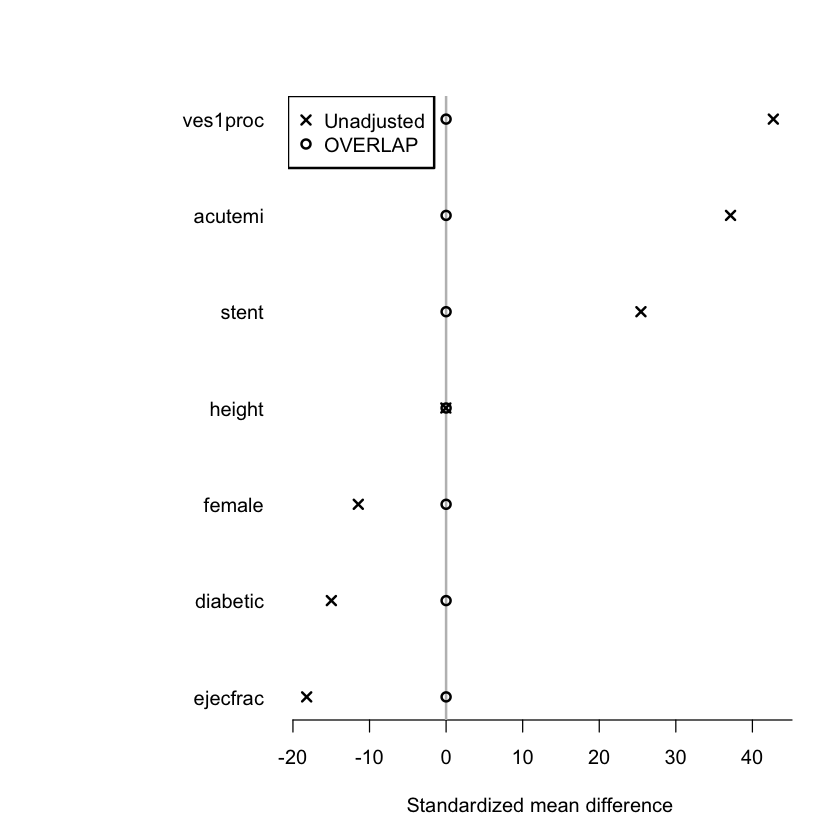

In [ ]:
library(PSW)

# 拟合权重
fit <- psw(
  data = lindner,
  form.ps = abcix ~ stent + height + female + diabetic +
            acutemi + ejecfrac + ves1proc,
  weight = "OVERLAP"
)

# 评价平衡
par(bg = "white")
psw.balance(
  data = lindner,
  form.ps = abcix ~ stent + height + female + diabetic +
            acutemi + ejecfrac + ves1proc,
  weight = "OVERLAP",
)

In [19]:
# 二分类结局
psw.wt(
  data = lindner,
  form.ps = abcix ~ stent + height + female + diabetic +
            acutemi + ejecfrac + ves1proc,
  weight = "OVERLAP",
  out.var = "sixMonthSurvive",
  family = "binomial"
)

$weight
[1] "OVERLAP"

$ps.model

Call:  glm(formula = as.formula(form.ps), family = binomial(link = "logit"), 
    data = dat)

Coefficients:
(Intercept)        stent       height       female     diabetic      acutemi  
    2.96565      0.57302     -0.01537     -0.35906     -0.40681      1.19955  
   ejecfrac     ves1proc  
   -0.01479      0.76050  

Degrees of Freedom: 995 Total (i.e. Null);  988 Residual
Null Deviance:	    1215 
Residual Deviance: 1124 	AIC: 1140

$ps.hat
  [1] 0.4079170 0.5784602 0.5244469 0.4727311 0.4930466 0.5625524 0.5064128
  [8] 0.5658837 0.5359625 0.5182184 0.5359625 0.5611645 0.5288519 0.4166222
 [15] 0.5449952 0.5724827 0.5564009 0.5499251 0.4204694 0.4995949 0.4805425
 [22] 0.3121753 0.5792838 0.5762555 0.5276085 0.5481045 0.5596212 0.5100877
 [29] 0.5406088 0.5214775 0.5740194 0.5442794 0.5488030 0.4005160 0.5806900
 [36] 0.5237606 0.5459923 0.5283278 0.5837417 0.5366468 0.5214775 0.5276085
 [43] 0.5258864 0.5251667 0.5406088 0.5122514 0.5428806 0.5556

In [20]:
# 连续结局
psw.wt(
  data = lindner,
  form.ps = abcix ~ stent + height + female + diabetic +
            acutemi + ejecfrac + ves1proc,
  weight = "OVERLAP",
  out.var = "cardbill",
  family = "gaussian"
)

$weight
[1] "OVERLAP"

$ps.model

Call:  glm(formula = as.formula(form.ps), family = binomial(link = "logit"), 
    data = dat)

Coefficients:
(Intercept)        stent       height       female     diabetic      acutemi  
    2.96565      0.57302     -0.01537     -0.35906     -0.40681      1.19955  
   ejecfrac     ves1proc  
   -0.01479      0.76050  

Degrees of Freedom: 995 Total (i.e. Null);  988 Residual
Null Deviance:	    1215 
Residual Deviance: 1124 	AIC: 1140

$ps.hat
  [1] 0.4079170 0.5784602 0.5244469 0.4727311 0.4930466 0.5625524 0.5064128
  [8] 0.5658837 0.5359625 0.5182184 0.5359625 0.5611645 0.5288519 0.4166222
 [15] 0.5449952 0.5724827 0.5564009 0.5499251 0.4204694 0.4995949 0.4805425
 [22] 0.3121753 0.5792838 0.5762555 0.5276085 0.5481045 0.5596212 0.5100877
 [29] 0.5406088 0.5214775 0.5740194 0.5442794 0.5488030 0.4005160 0.5806900
 [36] 0.5237606 0.5459923 0.5283278 0.5837417 0.5366468 0.5214775 0.5276085
 [43] 0.5258864 0.5251667 0.5406088 0.5122514 0.5428806 0.5556

# {PSweight}包

In [ ]:
library(PSweight)

PSweight <- PSweight(
  ps.formula = abcix ~ stent + height + female + diabetic +
               acutemi + ejecfrac + ves1proc,
  data = lindner,
  weight = "OVERLAP",
  yname = "cardbill",
  family = "gaussian",
  ps.method = "glm",
  out.method = "glm"
)

ERROR: Error in ftilt(psest): could not find function "ftilt"


# {twang} 包

In [31]:
library(twang)

formula.ps <- abcix ~ stent + height + female + diabetic + acutemi + ejecfrac + ves1proc

ps.twang <- ps(
  formula = formula.ps,
  data = lindner,
  n.trees = 10000,
  interaction.depth = 3,
  shrinkage = 0.01,
  bag.fraction = 1,
  n.minobsinnode = 10,
  perm.test.iters = 0,
  print.level = 2,
  verbose = FALSE,
  estimand = "ATE", #逆概率加权
  stop.method = c("ks.max","ks.mean"),
  sampw = NULL,
  version = "gbm",
  ks.exact = NULL
)
summary(ps.twang)

            n.treat n.ctrl ess.treat ess.ctrl    max.es    mean.es     max.ks
unw             698    298  698.0000 298.0000 0.3925637 0.20528943 0.18841945
ks.max.ATE      698    298  664.9783 238.2625 0.1085104 0.05281301 0.03806912
ks.mean.ATE     698    298  655.7339 229.0034 0.1144059 0.05292428 0.04013745
            max.ks.p    mean.ks iter
unw               NA 0.09791845   NA
ks.max.ATE        NA 0.02522488 1187
ks.mean.ATE       NA 0.02233864 2582

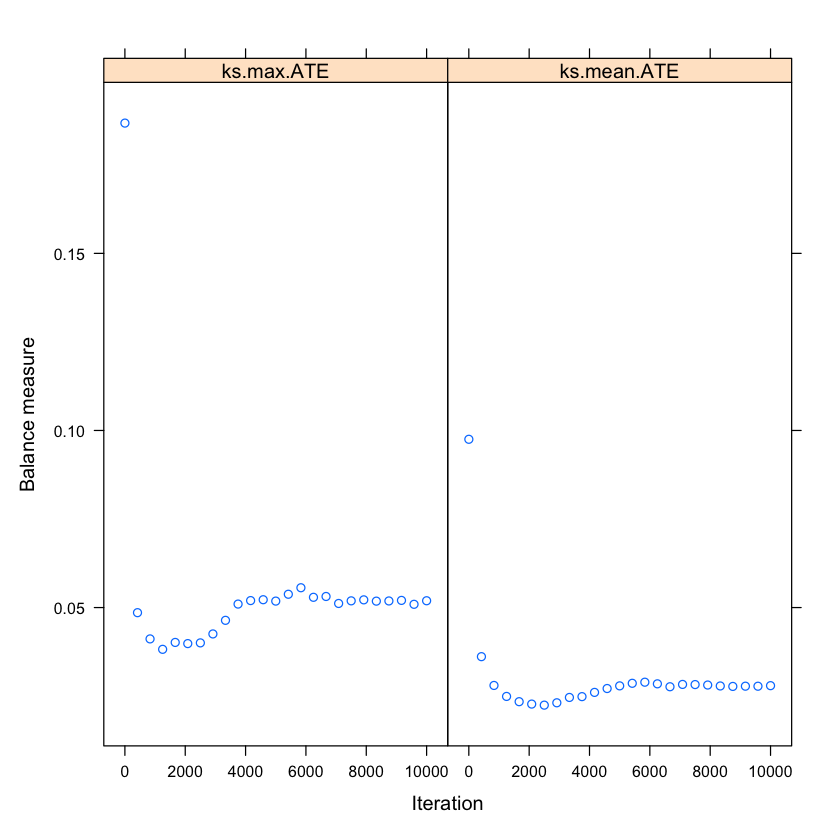

In [32]:
plot(ps.twang)

In [36]:
lindner$twang_wt <- get.weights(ps.twang, stop.method = c("ks.max"))

#根据ks值确定最优迭代并提取权重
library(survey)
design.ps <- svydesign(ids = ~1, weights = ~twang_wt, data = lindner)

#结合survey包 
svyglm1 <- svyglm(formula = cardbill ~ abcix, design = design.ps, family = "gaussian") #连续型结局

# tidy结果
library(broom)
tidy(svyglm1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),15161.095,862.5795,17.5764601,1.991621e-60
abcix,883.021,934.2501,0.9451656,3.448040e-01


In [38]:
svyglm2 <- svyglm(formula = sixMonthSurvive ~ abcix, design = design.ps, family = "binomial") #二分类结局

# 获得OR结果
library(questionr)
odds.ratio(svyglm2)

,OR,2.5 %,97.5 %,p
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),16.934861,9.326963,30.74843,8.052062e-20
abcix,3.943146,1.685540,9.22458,1.582711e-03
